In [5]:
import pandas as pd 
import seaborn as sns 

ny = pd.read_csv("./beginner_datasets/archive/party_in_nyc.csv")
ny.sample(3)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
5465,2016-01-10 23:26:03,2016-01-11 04:02:58,Residential Building/House,11221.0,BROOKLYN,BROOKLYN,40.693363,-73.933998
45406,2016-04-16 21:36:55,2016-04-17 02:02:38,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.853333,-73.927734
52663,2016-04-26 22:53:00,2016-04-27 00:21:06,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.855072,-73.934448


In [4]:
# tipo di strutture 
ny["Location Type"].unique()

array(['Store/Commercial', 'Residential Building/House',
       'Club/Bar/Restaurant', 'Street/Sidewalk', 'Park/Playground',
       'House of Worship'], dtype=object)

<Axes: xlabel='City'>

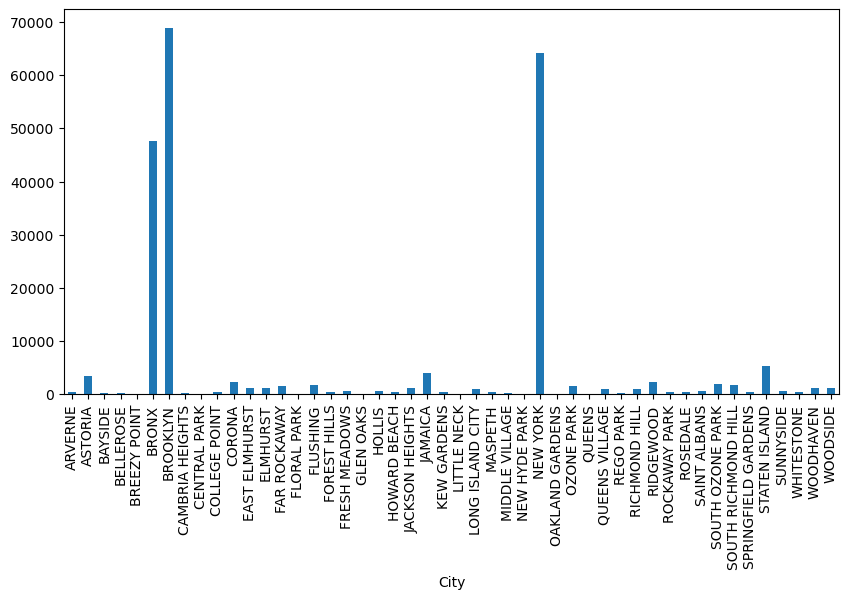

In [7]:
# chiamate per città 
party = ny.groupby("City")
party.Borough.count().plot(kind="bar",figsize=[10,5])

In [5]:
ny.isna()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
225409,False,False,False,False,False,False,False,False
225410,False,False,False,False,False,False,False,False
225411,False,False,False,False,False,False,False,False
225412,False,False,False,False,False,False,False,False


<Axes: xlabel='count', ylabel='City'>

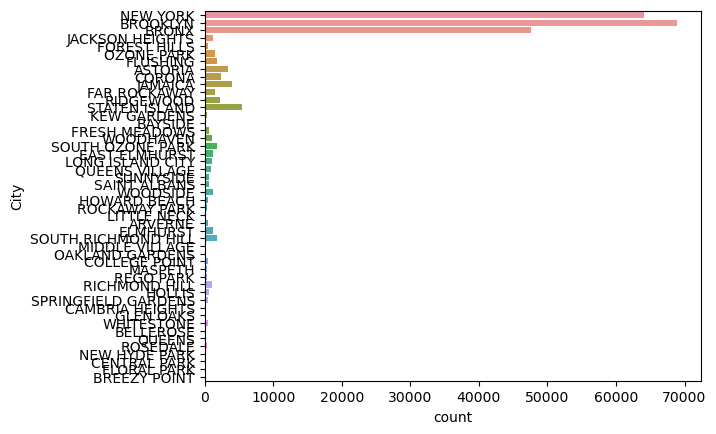

In [10]:
sns.countplot(data=ny, y="City")

In [12]:
# Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
ny.head(10)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
5,2015-12-31 00:08:05,2015-12-31 01:59:12,Residential Building/House,10467.0,BRONX,BRONX,40.858748,-73.865625
6,2015-12-31 00:11:40,2015-12-31 06:24:00,Residential Building/House,11230.0,BROOKLYN,BROOKLYN,40.617005,-73.956920
7,2015-12-31 00:12:13,2015-12-31 00:38:09,Residential Building/House,11215.0,BROOKLYN,BROOKLYN,40.665051,-73.981278
8,2015-12-31 00:12:37,2015-12-31 05:03:39,Residential Building/House,10463.0,BRONX,BRONX,40.875895,-73.912471
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201


In [59]:
ny.describe()
# mi prendo la latitudine longitudine min e max e traccio un quadrato 

min_max = ny.describe()
min_max = min_max.loc[["min","max"],["Latitude", "Longitude"]] 
min_max 

,Latitude,Longitude
min,40.498820,-74.251277
max,40.912178,-73.702303


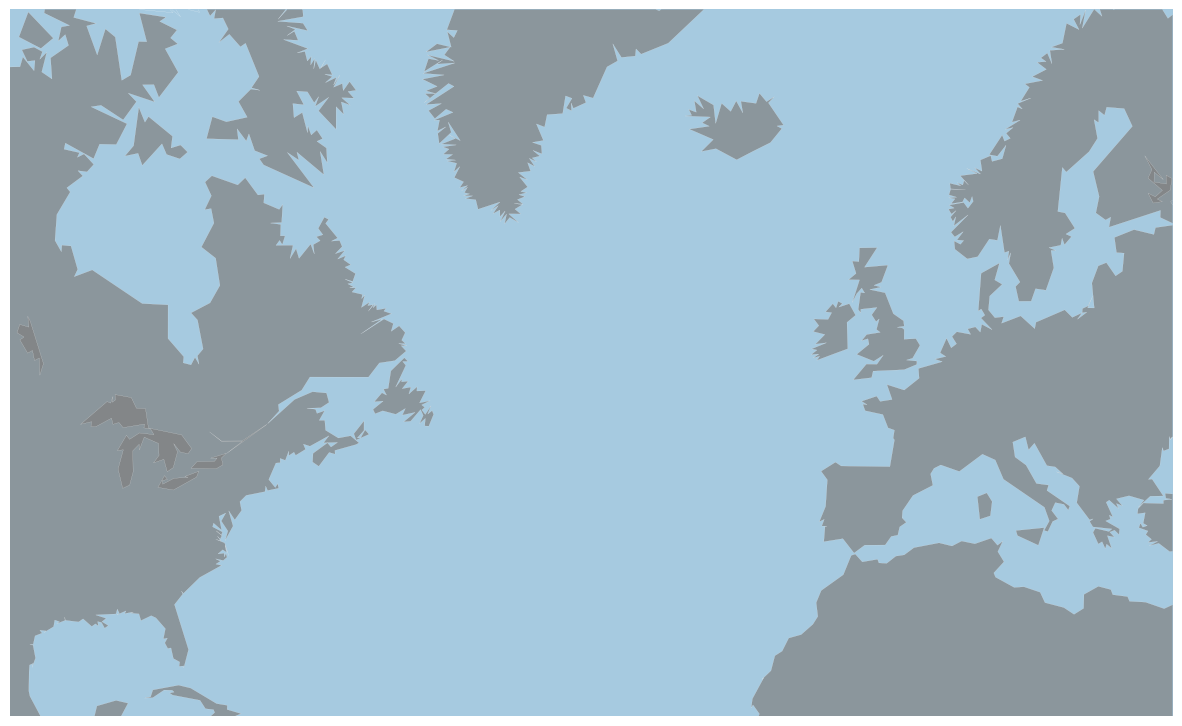

In [3]:
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=15,12

# A basic map
m = Basemap(llcrnrlon=-100,
            llcrnrlat=20,
            urcrnrlon=30,
            urcrnrlat=70,
            projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

In [6]:
# segnalazione per case private 
ny["Location Type"].unique()

array(['Store/Commercial', 'Residential Building/House',
       'Club/Bar/Restaurant', 'Street/Sidewalk', 'Park/Playground',
       'House of Worship'], dtype=object)

<Axes: ylabel='Location Type'>

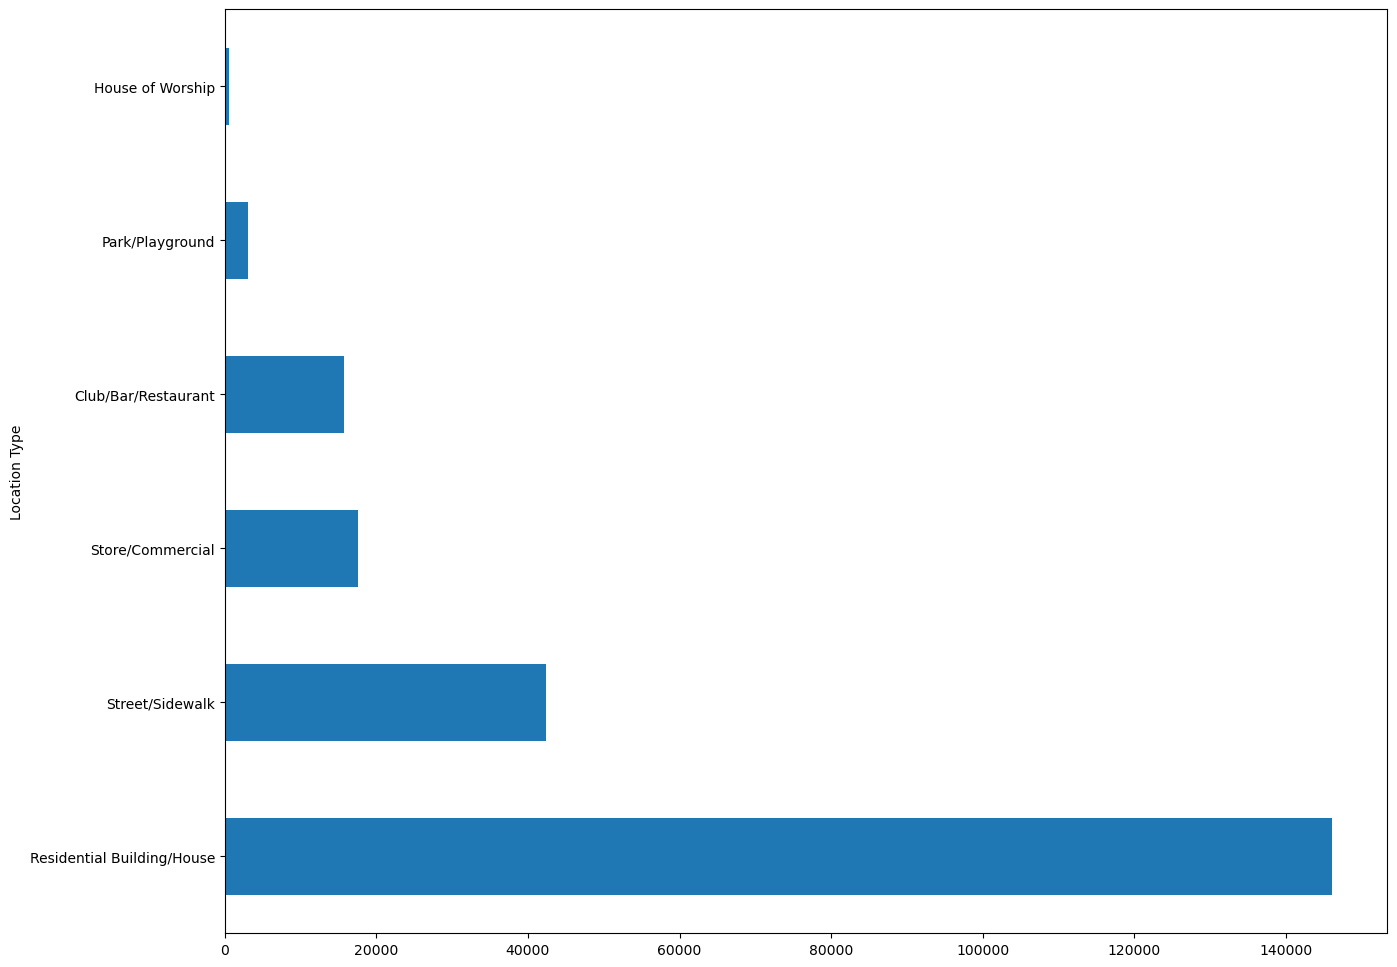

In [11]:
filtro_casa = ny["Location Type"] == "Residential Building/House"
# filtro e conto diretto sulla colonna location type 
ny.loc[filtro_casa, "Location Type"].value_counts()

ny["Location Type"].value_counts().plot(kind="barh")

<Axes: xlabel='count', ylabel='Borough'>

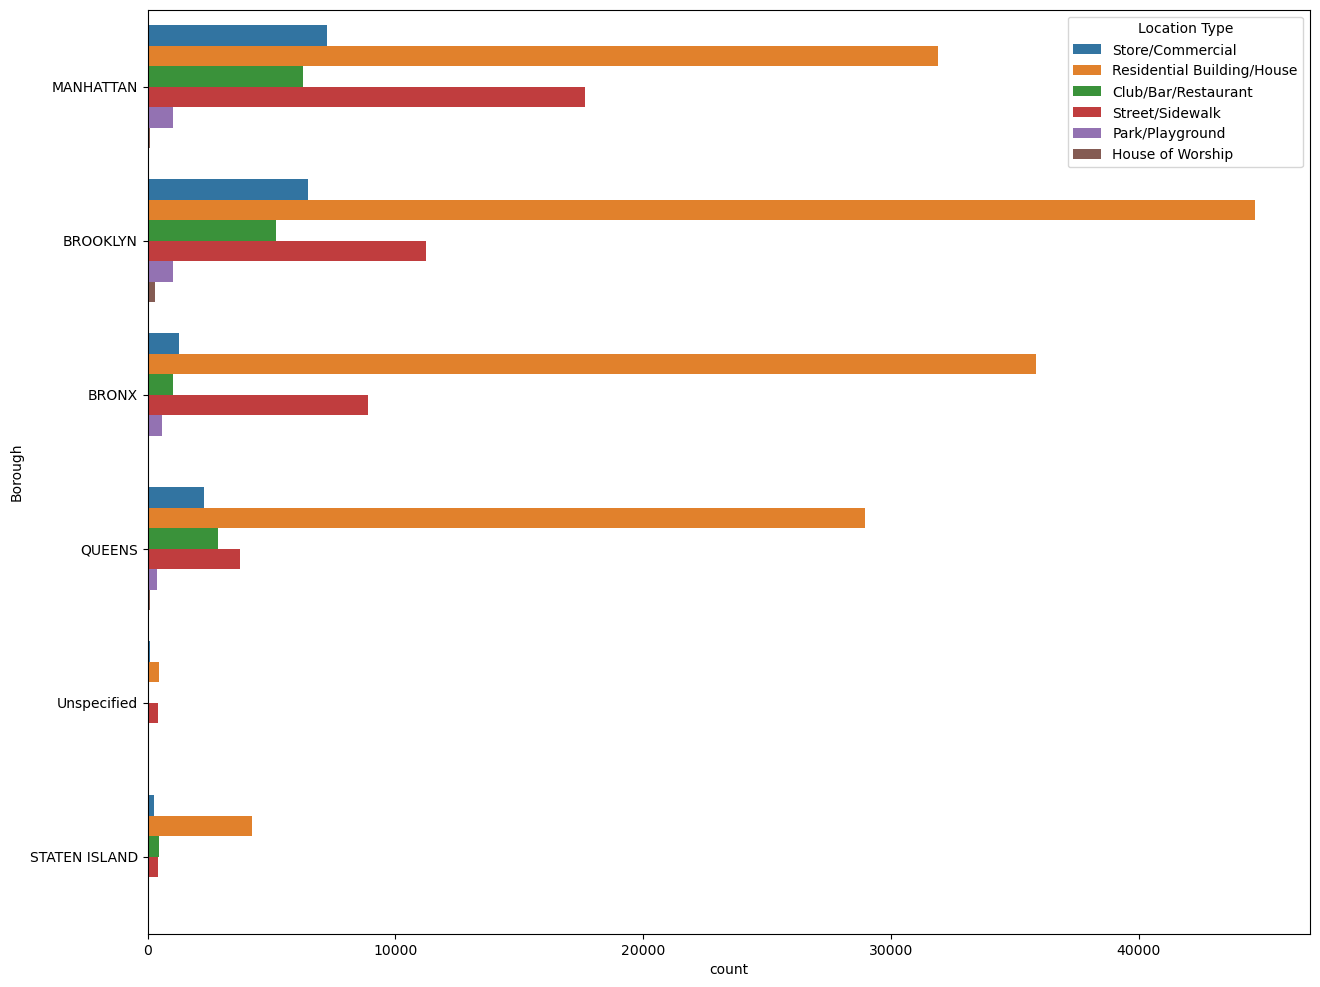

In [13]:
# segnalazione per quartiere 

sns.countplot(data=ny, y="Borough", hue="Location Type")